In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [29]:
df=pd.read_csv(r"D:\dataset\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [30]:
df.shape

(32581, 12)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [32]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [33]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

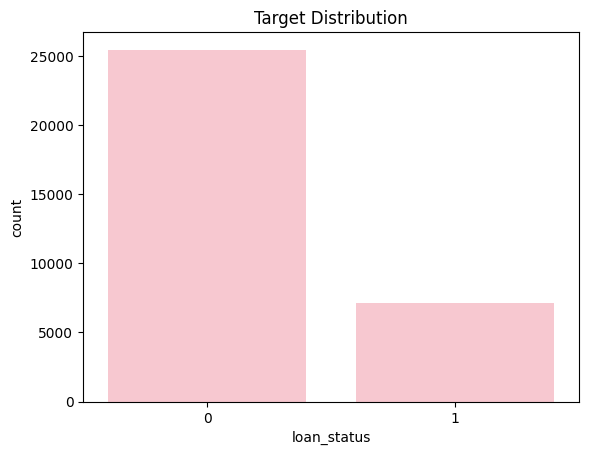

In [34]:
sbn.countplot(x='loan_status', data=df, color='pink')
plt.title("Target Distribution")
plt.show()

In [9]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [10]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [12]:
cat_cols = X.select_dtypes(include='object').columns
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [13]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(random_state=42)

In [16]:
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [17]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(6517,))

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report : \n",classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Accuracy: 0.8896731624980819
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      5095
           1       0.74      0.77      0.75      1422

    accuracy                           0.89      6517
   macro avg       0.84      0.85      0.84      6517
weighted avg       0.89      0.89      0.89      6517

Confusion Matrix: 
 [[4706  389]
 [ 330 1092]]


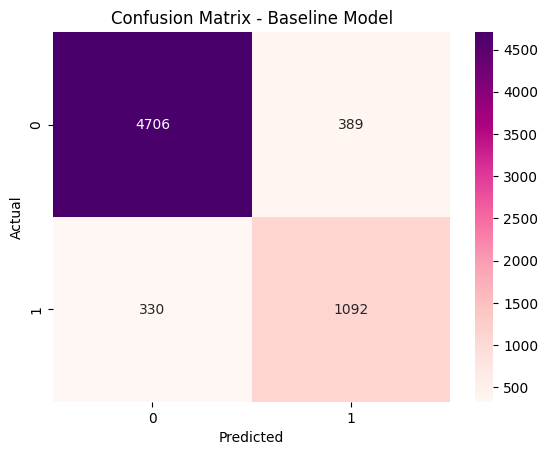

In [19]:
sbn.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Model")
plt.show()
#False negatives are costly in credit risk, as defaulters being classified as safe leads to financial loss.

In [ ]:
#Controlled Decision Tree

In [20]:
dt_controlled = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=20,
    random_state=42
)

In [21]:
dt_controlled.fit(X_train, y_train)
y_predctrl = dt_controlled.predict(X_test)
y_predctrl

array([0, 0, 0, ..., 0, 0, 0], shape=(6517,))

In [22]:
print("Accuracy:", accuracy_score(y_test, y_predctrl))
print("Classification Report : \n",classification_report(y_test, y_predctrl))

Accuracy: 0.9028694184440693
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      5095
           1       0.98      0.57      0.72      1422

    accuracy                           0.90      6517
   macro avg       0.94      0.78      0.83      6517
weighted avg       0.91      0.90      0.89      6517



In [23]:
feature_imp = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': dt_controlled.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_imp.head()
#After one-hot encoding categorical variables, feature importance was mapped using the transformed feature space.

,Feature,Importance
5,loan_percent_income,0.362709
9,person_home_ownership_RENT,0.206847
4,loan_int_rate,0.195476
1,person_income,0.100491
17,loan_grade_D,0.041086


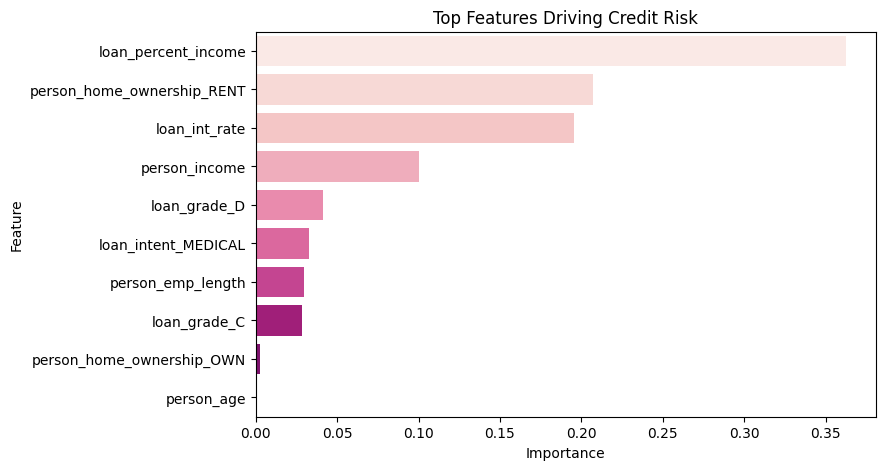

In [24]:
plt.figure(figsize=(8,5))
sbn.barplot(
    x='Importance',
    y='Feature',
    data=feature_imp.head(10),
    palette='RdPu',hue='Feature',
    legend=False
)
plt.title("Top Features Driving Credit Risk")
plt.show()

In [ ]:
#Risk Band

In [25]:
prob = dt_controlled.predict_proba(X_test)[:, 1]
prob

array([0.05783559, 0.05783559, 0.05783559, ..., 0.05783559, 0.05783559,
       0.18434343], shape=(6517,))

In [26]:
def risk_band(pr):
    if pr < 0.3:
        return "Low Risk"
    elif pr < 0.6:
        return "Medium Risk"
    else:
        return "High Risk"
risk_labels = [risk_band(p) for p in prob]

In [27]:
pd.DataFrame({
    "Actual": y_test.values,
    "Default_Probability": prob,
    "Risk_Level": risk_labels
}).head()

,Actual,Default_Probability,Risk_Level
0,0,0.057836,Low Risk
1,0,0.057836,Low Risk
2,0,0.057836,Low Risk
3,0,0.057836,Low Risk
4,0,0.057836,Low Risk


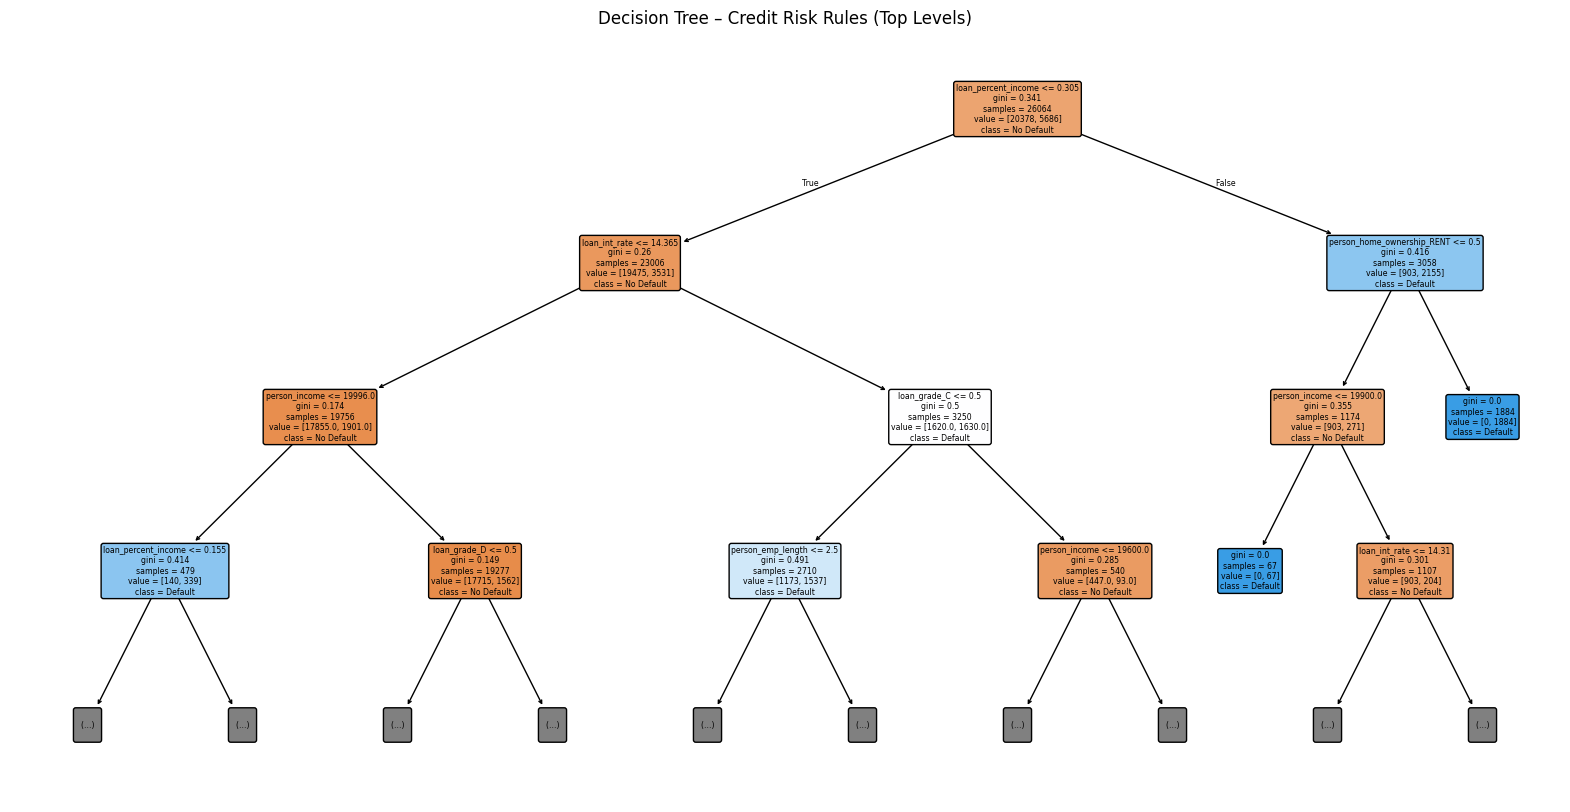

In [36]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_controlled,
    feature_names=X_encoded.columns,
    class_names=["No Default", "Default"],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Decision Tree – Credit Risk Rules (Top Levels)")
plt.show()